In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os
import json
import requests
import openai
from base64 import b64decode
from io import BytesIO
from PIL import Image

<IPython.core.display.Javascript object>

In [3]:
openai.api_key = os.environ.get("OPENAI_API_KEY")

<IPython.core.display.Javascript object>

- Resolution	Price per image


- 1024×1024 $0.020


- 512×512 $0.018


- 256×256 $0.016

#### Parameters

- pompt - max 1000 chars


- n - 1 to 10


- size - 256x256, 512x512, or 1024x1024


- response_format - url or b64_json

In [4]:
size = "512x512"

<IPython.core.display.Javascript object>

In [5]:
response = openai.Image.create(
    prompt="A cyberpunk monkey hacker dreaming of a beautiful bunch of bananas, digital art",
    n=2,
    size=size,
    response_format="url",
)
print(response)

{
  "created": 1679024493,
  "data": [
    {
      "url": "https://oaidalleapiprodscus.blob.core.windows.net/private/org-d43SCUagDtNyDX6kEMd46PRB/user-bNm6hPDQtLlWqFySYoliLmWp/img-YxJYfeIkMP8yOzgRFszMOVpB.png?st=2023-03-17T02%3A41%3A33Z&se=2023-03-17T04%3A41%3A33Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-03-16T19%3A13%3A36Z&ske=2023-03-17T19%3A13%3A36Z&sks=b&skv=2021-08-06&sig=6KgUqtHL0kvkpIiiv/GBPoU7PD65bJvi5lF/Mok8Lyo%3D"
    },
    {
      "url": "https://oaidalleapiprodscus.blob.core.windows.net/private/org-d43SCUagDtNyDX6kEMd46PRB/user-bNm6hPDQtLlWqFySYoliLmWp/img-CRXJEe6aUkk76krWQqp68JSk.png?st=2023-03-17T02%3A41%3A33Z&se=2023-03-17T04%3A41%3A33Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-03-16T19%3A13%3A36Z&ske=2023-03-17T19%3A13%3A36Z&sks=b&skv=2021-08-06&sig=HeUv3ofWDYpcb7

<IPython.core.display.Javascript object>

In [6]:
for index, image_dict in enumerate(response["data"]):
    image_url = image_dict["url"]
    img = requests.get(image_url).content  # download the image
    file_name = "images/image_url_" + str(index) + ".png"
    with open(file_name, "wb") as image_file:
        image_file.write(img)

<IPython.core.display.Javascript object>

In [7]:
#!ls -la images/

<IPython.core.display.Javascript object>

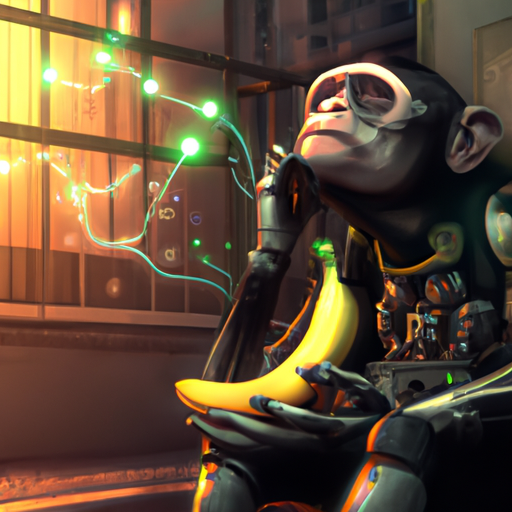

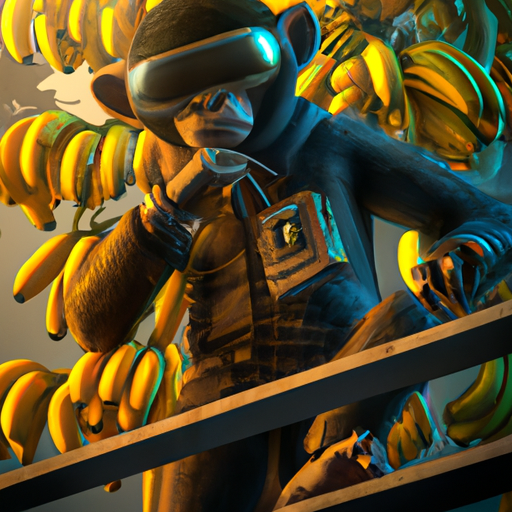

<IPython.core.display.Javascript object>

In [8]:
display(Image.open("images/image_url_0.png"))
display(Image.open("images/image_url_1.png"))

In [9]:
response = openai.Image.create(
    prompt="a white siamese cat", n=2, size=size, response_format="b64_json",
)
print(response)

{
  "created": 1679024503,
  "data": [
    {
      "b64_json": "iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAIAAAB7GkOtAAAAaGVYSWZNTQAqAAAACAACknwAAgAAACkAAAAmkoYAAgAAABgAAABQAAAAAE9wZW5BSS0tMzE3YmQ2MGVjZTU2OTkzZGI0MjJiY2ZlMTRiYjY5NTIAAE1hZGUgd2l0aCBPcGVuQUkgREFMTC1FACyVo0EAAQAASURBVHgBABaE6XsBFBUW/vv9/f7+AQIB/wEBAQIAAP//AAABAAD/AgEB/v0BAAECAP78AgMBAP/+/f4AAQIB/wACAgD+AAEB//7+AAACAAABAQD//wIA/v7+AwEBAQD/AAAC/QEAAv////8A/v7/AgIB/wABAAIAAv3//wIAAP4BAQIAAAEA//8AAAEA/f/+AwD/AQAE/f/9AwIA/f4AAQABAP//AAMCAAD/A/0C/QH+AQAAAAABAgL//gAB//8AAAEB//3+AQH//wAA/gAA/wH+BAEABP0C/wMA/vwAAgQAAf8A//7/AAUEBwgLBAgLAwcIBwoLBgsMBAgKBQkMBwcIBQkIBAcGBwgHBgQGCgoIAQD/AQIB/wABAgIAAP/7Af38/Pv9//z6/v/+Af/6/fv++/78/P38AgAAAgH//v0AAAH8///+Af4B/wEBAwID+/78BAEDAAH/AwIFAAACAwMCAwQEAgEDAAMFAgMC/wIDAwQCBQIIAQIC/f7//gH/AwIAAP7/+/z8+vz+/Pr4+/r6/Pn3/fb3/fj3/fr5/vj6+fn3/vf0+/b0/Pv5/Pn4Af/8AAH/BAIE/gD/BAMAAf79AgAB/QMABAMD/wAABQEAAQID/wH+AgABAwEAAQABAP///wH+AQEBAQD+AQEC//79AgMGAgL+AQABAQD//gIBAP8BBAEBAAIBAQABAP7/AAEAAgMC/wAAAP//AAAB/v78AwME

<IPython.core.display.Javascript object>

In [10]:
for index, image_dict in enumerate(response["data"]):
    img = b64decode(image_dict["b64_json"])
    image_file = "images/image_b64_" + str(index) + ".png"
    with open(image_file, mode="wb") as img_file:
        img_file.write(img)

<IPython.core.display.Javascript object>

In [13]:
#!ls -la images/

<IPython.core.display.Javascript object>

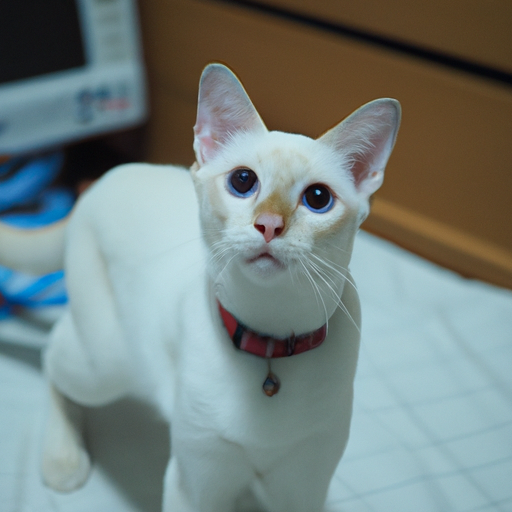

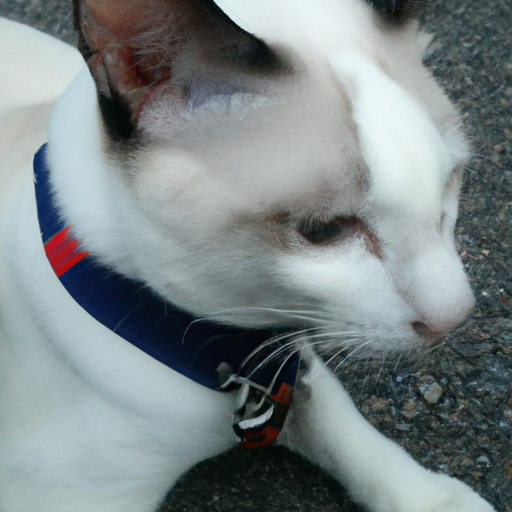

<IPython.core.display.Javascript object>

In [12]:
display(Image.open("images/image_b64_0.png"))
display(Image.open("images/image_b64_1.png"))